In [1]:
url = 'https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/13_dropout_layer/sonar_dataset.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
### Load the Data

df = pd.read_csv(url)
df.head(3)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R


In [5]:
df = pd.read_csv(url, header=None)
df.sample(3)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
79,0.0108,0.0086,0.0058,0.0460,0.0752,0.0887,0.1015,0.0494,0.0472,0.0393,...,0.0029,0.0078,0.0114,0.0083,0.0058,0.0003,0.0023,0.0026,0.0027,R
74,0.0109,0.0093,0.0121,0.0378,0.0679,0.0863,0.1004,0.0664,0.0941,0.1036,...,0.0077,0.0023,0.0117,0.0053,0.0077,0.0076,0.0056,0.0055,0.0039,R
40,0.0068,0.0232,0.0513,0.0444,0.0249,0.0637,0.0422,0.1130,0.1911,0.2475,...,0.0173,0.0163,0.0055,0.0045,0.0068,0.0041,0.0052,0.0194,0.0105,R


### Target Column is 60

In [6]:
 df.shape

(208, 61)

In [7]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [8]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [9]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

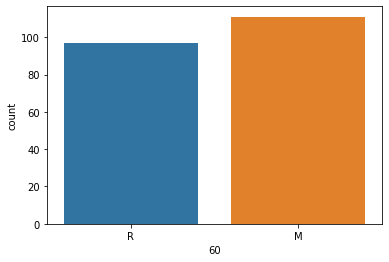

In [10]:
sns.countplot(df[60])

### Divide X and y 

In [11]:
X = df.drop(60, axis='columns')
y = df[60]

In [12]:
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [13]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [15]:
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [18]:
y = pd.get_dummies(y, drop_first=True) # drop the first dummy

y.sample(3)

,R
33,1
100,0
203,0


In [19]:
y.value_counts()

R
0    111
1     97
dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [24]:
X_train.shape, X_test.shape

((156, 60), (52, 60))

In [25]:
import tensorflow as tf
from tensorflow import keras

### Model Building

In [31]:
model = keras.Sequential([
    keras.layers.Dense(60, input_shape=(60,), activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [32]:

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [34]:
model.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6120 - accuracy: 0.7115
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5861 - accuracy: 0.7628
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5578 - accuracy: 0.7821
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5288 - accuracy: 0.7821
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5088 - accuracy: 0.7692
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4837 - accuracy: 0.8141
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4592 - accuracy: 0.8141
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4369 - accuracy: 0.8013
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4439 - accuracy: 0.8013
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4101 - accuracy: 0.8590
Epoch 11/

In [35]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.4895 - accuracy: 0.8269


[0.4895031154155731, 0.8269230723381042]

In [36]:
y_pred = model.predict(X_test).reshape(-1)

print(y_pred[:10])


# round the values to nearest integer ie. 0 or 1 
y_pred = np.round(y_pred)
print(y_pred[:10])

2/2 [==============================] - 0s 6ms/step
[1.02496015e-04 9.99680042e-01 6.35030866e-02 5.71251810e-02
 9.99633908e-01 5.04840937e-05 9.91372347e-01 9.99969006e-01
 4.66695492e-04 9.99939919e-01]
[0. 1. 0. 0. 1. 0. 1. 1. 0. 1.]


In [37]:
y_test[:10]

,R
156,0
21,1
193,0
159,0
34,1
196,0
6,1
25,1
115,0
51,1


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        32
           1       0.76      0.80      0.78        20

    accuracy                           0.83        52
   macro avg       0.82      0.82      0.82        52
weighted avg       0.83      0.83      0.83        52



### Adding a Dropout Layer

In [39]:
model = keras.Sequential([
    keras.layers.Dense(60, input_shape=(60,), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 1s 7ms/step - loss: 0.7153 - accuracy: 0.5064
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.7174 - accuracy: 0.5064
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5769
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.7023 - accuracy: 0.5000
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6994 - accuracy: 0.5064
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5769
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5321
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6687 - accuracy: 0.6282
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7087 - accuracy: 0.4936
Epoch 10/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6960 - accuracy: 0.5128
Epoch 11/

In [40]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.3191 - accuracy: 0.8077


[0.3190774917602539, 0.807692289352417]

In [41]:
model = keras.Sequential([
    keras.layers.Dense(60, input_shape=(60,), activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 1s 6ms/step - loss: 0.7043 - accuracy: 0.5256
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.5833
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5192
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.4615
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.5385
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.5385
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.5449
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6579 - accuracy: 0.6090
Epoch 9/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6562 - accuracy: 0.5962
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6451 - accuracy: 0.6474
Epoch 11/

In [42]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.4414 - accuracy: 0.8462


[0.441366046667099, 0.8461538553237915]

In [43]:
y_pred_d = model.predict(X_test).reshape(-1)

print(y_pred_d[:10])


# round the values to nearest integer ie. 0 or 1 
y_pred = np.round(y_pred_d)
print(y_pred[:10])

2/2 [==============================] - 0s 5ms/step
[0.00950924 0.822514   0.07776345 0.583273   0.99704105 0.00170107
 0.94867635 0.9999925  0.09237389 0.99998283]
[0. 1. 0. 1. 1. 0. 1. 1. 0. 1.]


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        32
           1       0.75      0.90      0.82        20

    accuracy                           0.85        52
   macro avg       0.84      0.86      0.84        52
weighted avg       0.86      0.85      0.85        52



In [50]:
from sklearn.metrics import accuracy_score

print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Accuracy Score :  0.8461538461538461
